<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Handwritten_Digit_Recognition(0_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Advanced Learning Algorithms/Week 2'
os.chdir(new_directory)

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision = 2)

In [55]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [56]:
z = np.array([1.,2.,3.,4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my softmax:  {a}")
print(f"tensorflow softmax:  {atf}")

my softmax:  [0.03 0.09 0.24 0.64]
tensorflow softmax:  [0.03 0.09 0.24 0.64]


In [57]:
X, y = load_data()
X.shape

(5000, 400)

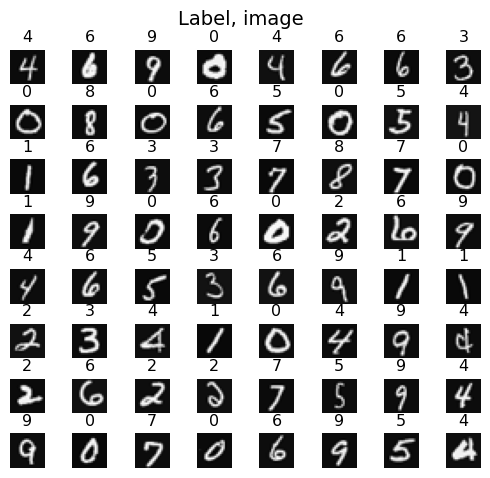

In [58]:
m,n = X.shape
fig,axes = plt.subplots(8,8, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0,0.03,1,0.91])

widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index= np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize = 14)

In [59]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation = "relu", name = "L1"),
        tf.keras.layers.Dense(15, activation = "relu", name = "L2"),
        tf.keras.layers.Dense(10, activation = "linear", name = "L3")
    ], name = "my_model"
)

In [60]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
[layer1, layer2, layer3] = model.layers

In [62]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()


In [63]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
)

history = model.fit(
    X,y,
    epochs = 40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5122
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5800
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3918
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3186
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2794
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2088
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1971
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1779
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1674
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 13/40
157/157 [====

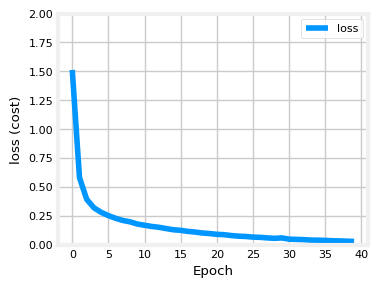

In [64]:
plot_loss_tf(history)

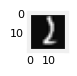

1/1 [==============================] - 0s 59ms/step
 predicting a Two: 
[[-12.42   4.16   7.4    1.24  -6.15  -7.18  -4.66   3.83  -4.88  -6.03]]
 Largest Prediction index: 2


In [65]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [66]:
prediction_p = tf.nn.softmax(prediction)

In [67]:
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 21ms/step


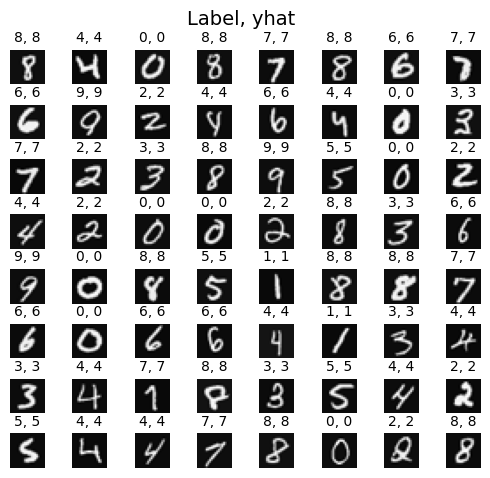

In [73]:
m, n = X.shape
fig,axes = plt.subplots(8,8, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0,0.03,1,0.91])
widgvis(fig)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    ax.set_title(f"{y[random_index,0]}, {yhat}", fontsize = 10)
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize = 14)
plt.show()


1/1 [==============================] - 0s 24ms/step
24 errors out of 5000 images


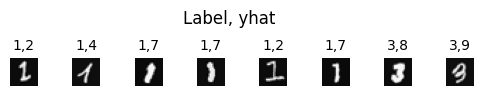

In [75]:
print(f"{display_errors(model,X,y)} errors out of {len(X)} images")